# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [56]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [58]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city SEE IF THIS WORKS - MAYBE REMOVE INFO AFTER CITY
    city_url = f"{url}APPID={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    #print(city_weather)
    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | banda aceh
Processing Record 2 of Set 1 | burns lake
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | ranong
Processing Record 5 of Set 1 | pasighat
Processing Record 6 of Set 1 | rawson
Processing Record 7 of Set 1 | beni
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | kisaran
Processing Record 10 of Set 1 | leningradskiy
Processing Record 11 of Set 1 | viedma
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | sao jose da coroa grande
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | mirnyy
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | hobe sound
Proces

In [59]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [60]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,banda aceh,5.5577,95.3222,28.91,67,100,6.62,ID,1690878991
1,burns lake,54.2331,-125.7533,5.68,89,22,0.90,CA,1690878872
2,geraldton,-28.7667,114.6000,22.23,33,0,5.14,AU,1690878948
3,ranong,9.9658,98.6348,29.96,80,88,6.65,TH,1690879037
4,pasighat,28.0667,95.3333,35.68,55,99,1.41,IN,1690879037


In [61]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [62]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,banda aceh,5.5577,95.3222,28.91,67,100,6.62,ID,1690878991
1,burns lake,54.2331,-125.7533,5.68,89,22,0.90,CA,1690878872
2,geraldton,-28.7667,114.6000,22.23,33,0,5.14,AU,1690878948
3,ranong,9.9658,98.6348,29.96,80,88,6.65,TH,1690879037
4,pasighat,28.0667,95.3333,35.68,55,99,1.41,IN,1690879037


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

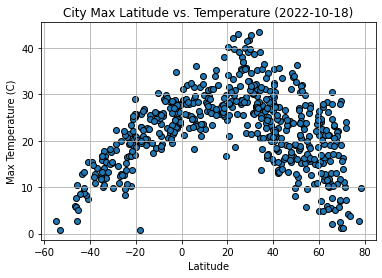

In [68]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("/..output_data/Fig1.png")
# Show plot
plt.show()


#### Latitude Vs. Humidity

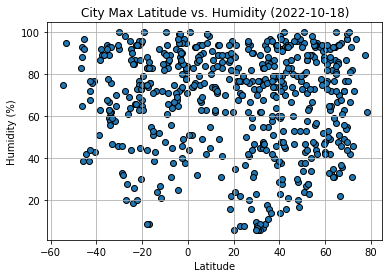

In [69]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("/..output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

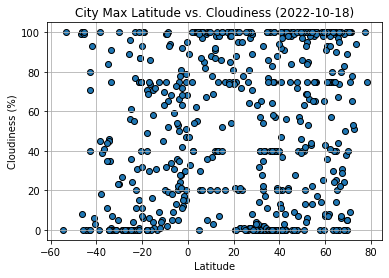

In [71]:
# Build scatter plot for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("/..output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

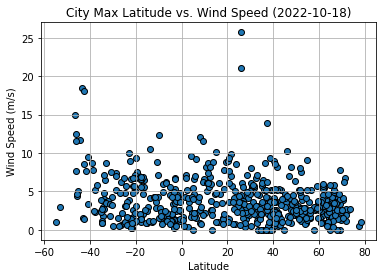

In [72]:
# Build scatter plot for latitude vs. wind speed (SEE BELOW - Y AXIZ IS DIFFERENT)
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("/..output_data/Fig4.png")
# Show plot
plt.show()

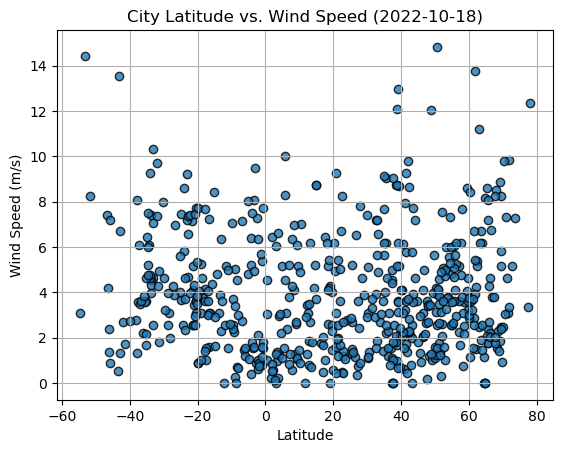

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df{"latitude"},
    city_data_df{"windspeed_mph"},
)

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Windspeed (mph)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      4.036404
1      3.166722
2      4.649678
3      3.957645
4      3.634236
         ...   
568    2.942164
569    4.187261
570    3.222106
571    3.688649
572    3.073856
Name: Lat, Length: 573, dtype: float64


In [78]:
#Linear Equation string:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.02x +4.14


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,geraldton,-28.7667,114.6000,22.23,33,0,5.14,AU,1690878948
5,rawson,-43.3002,-65.1023,12.87,39,0,18.43,AR,1690878873
9,viedma,-40.8135,-62.9967,15.35,43,3,9.43,AR,1690879038
11,cape town,-33.9258,18.4232,13.95,60,0,4.02,ZA,1690879038
12,sao jose da coroa grande,-8.8978,-35.1478,23.58,86,65,1.37,BR,1690878874


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
#Sample from class:Day 3 activity 9
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = census_data_complete["Poverty Rate"].astype("float")
y_values = census_data_complete["Bank Count"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Poverty Rate')
plt.ylabel('Bank Count')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
#Start:


The r-value is: 0.7161472181434118


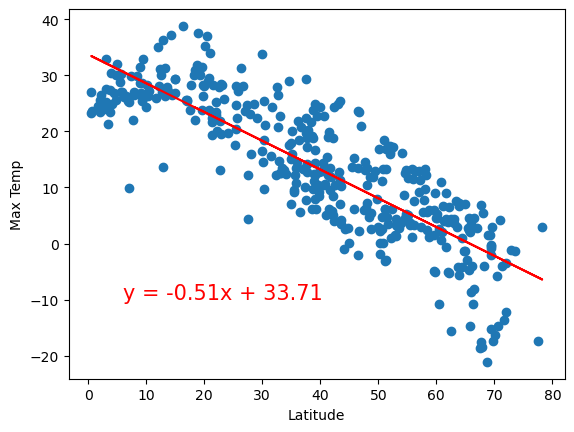

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


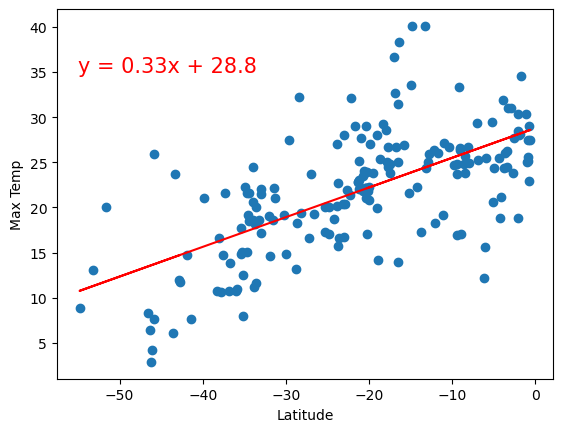

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


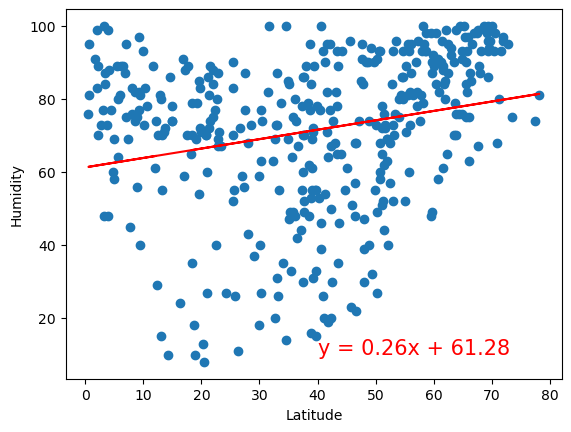

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


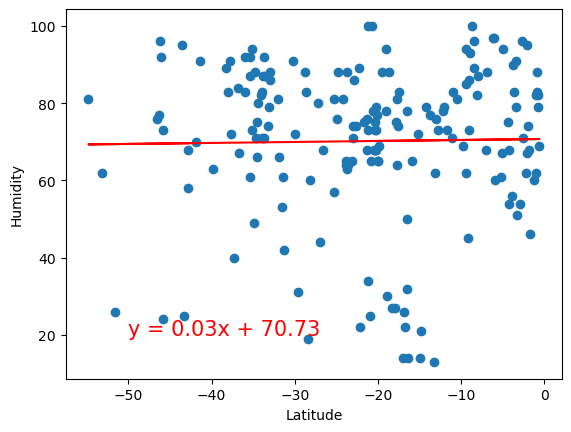

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


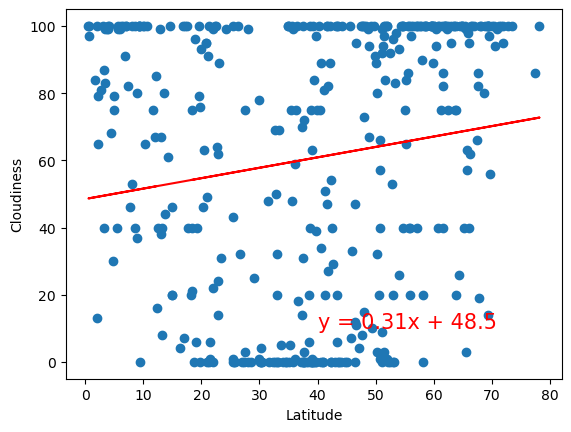

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


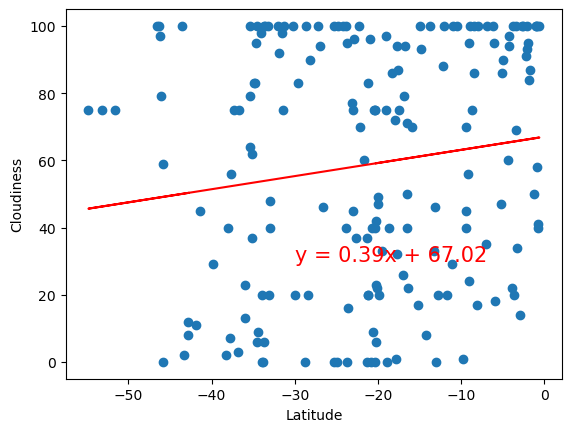

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


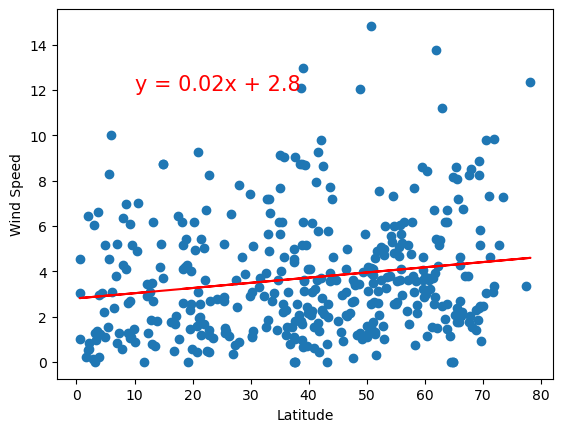

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


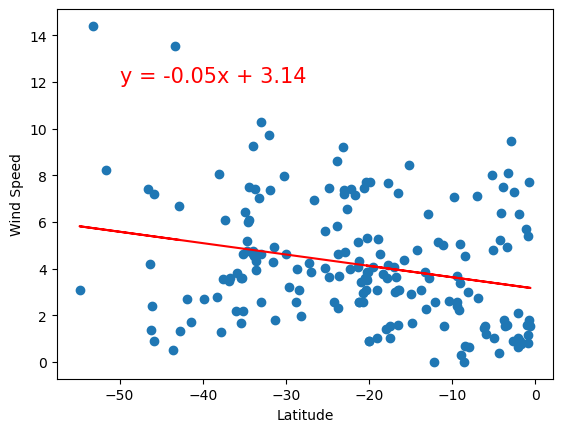

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE